Lineaarinen regressio: Jäiden lähtö. Luo lineaarinen regressiomalli, jossa x on eri vuosien saman kuukauden lämpötilapoikkeama (valitsemasi kuukausi) ja y on jäämerkin lähtöpäivä.

# Lineaarinen regressioharjoitus

Jäiden lähdön korrelaatio kuukauden lämpötilaan

https://lcrovaniemi.fi/index.php


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score



Päivät, jolloin jäidenlähtömerkki on lähtenyt

In [3]:
data = {
    "date": [
        "1964-05-14", "1965-05-03", "1966-05-17", "1967-05-10", "1968-05-19",
        "1969-05-20", "1970-05-15", "1971-05-14", "1972-05-11", "1973-05-09",
        "1974-05-13", "1975-05-05", "1976-05-10", "1977-05-12", "1978-05-15",
        "1979-05-11", "1980-05-08", "1981-05-17", "1982-05-10", "1983-04-30",
        "1984-05-07", "1985-05-18", "1986-05-10", "1987-05-16", "1988-05-09",
        "1989-04-27", "1990-04-27", "1991-05-02", "1992-05-08", "1993-05-07",
        "1994-04-30", "1995-05-07", "1996-05-20", "1997-05-16", "1998-05-08",
        "1999-04-29", "2000-04-29", "2001-05-05", "2002-04-29", "2003-05-09",
        "2004-05-01", "2005-05-06", "2006-05-01", "2007-04-27", "2008-05-03",
        "2009-05-03", "2010-05-04", "2011-04-26", "2012-05-07", "2013-05-01",
        "2014-04-24", "2015-04-27", "2016-04-29", "2017-05-17", "2018-05-06",
        "2019-04-29"
    ]
}
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df.head()

,date
0,1964-05-14
1,1965-05-03
2,1966-05-17
3,1967-05-10
4,1968-05-19


In [ ]:
df['year'] = df['date'].dt.year
df.head()

,date,year
0,1964-05-14,1964
1,1965-05-03,1965
2,1966-05-17,1966
3,1967-05-10,1967
4,1968-05-19,1968


Lämpötiladata haetaan täältä:

[https://www.ilmatieteenlaitos.fi/tilastoja-vuodesta-1961](https://www.ilmatieteenlaitos.fi/tilastoja-vuodesta-1961)

In [2]:
temp_deviation_df = pd.read_csv('./datasets/t2/rovaniemi.csv', sep=';')
temp_deviation_df.head()

,Category,Keskilämpötilan poikkeama 1991–2020 keskiarvosta
0,1961,"-2,2"
1,1962,"-1,2"
2,1963,4
3,1964,"-0,4"
4,1965,"-3,7"


In [21]:
# Siivousta ja mergetystä

temp_deviation_df.rename(columns={"Category": "year", "Keskilämpötilan poikkeama 1991–2020 keskiarvosta": "temp_deviation"}, inplace=True) # Siistitään sarakkeet lämpötiladatasta
temp_deviaton_df = temp_deviation_df[temp_deviation_df['year'] >= 1964] # Rajataan lämpötilapoikkeamat sopivaksi jäidenlähtömerkki -dataan
#temp_deviation_df.head()

ice_n_temp_merged_df = pd.merge(df, temp_deviation_df, on='year') # Mergetään
#ice_n_temp_merged_df.head()

ice_n_temp_merged_df['day_of_year'] = ice_n_temp_merged_df['date'].dt.dayofyear # Lisätään päivät kokonaislukuna
ice_n_temp_merged_df.head()

ice_n_temp_merged_df['temp_deviation'] = ice_n_temp_merged_df['temp_deviation'].str.replace(',', '.').astype(float) # Käännetään lämpötilapoikkeaman datatyyppi floatiksi

In [22]:
# Määritellään ominaisuudet ja kohde
X = ice_n_temp_merged_df[['temp_deviation']]
y = ice_n_temp_merged_df['day_of_year']

X.head()

,temp_deviation
0,-0.4
1,-3.7
2,-1.2
3,-0.9
4,-3.5


In [23]:
# Jaetaan data harjoittelu- ja testijoukkoihin (80 % / 20 %)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 1), (12, 1), (44,), (12,))

In [24]:
# Koulutetaan Lineaarinen Regressiomalli
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Ennustetaan testijoukolle

y_pred = model.predict(X_test)

In [28]:
# Lasketaan keskineliövirhe (rmse) + R2 -kerroin

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

r2, rmse

(0.2405888050607412, np.float64(6.847508130600904))

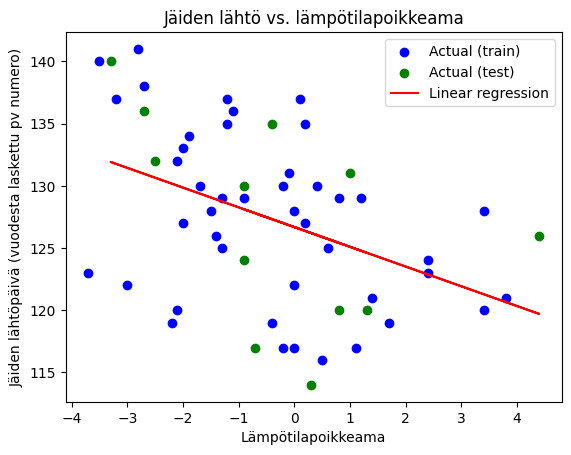

In [32]:
# Visualisoidaan tulokset

plt.scatter(X_train, y_train, color='blue', label='Actual (train)')
plt.scatter(X_test, y_test, color='green', label='Actual (test)')
plt.plot(X_test, y_pred, color='red', label='Linear regression')
plt.title('Jäiden lähtö vs. lämpötilapoikkeama')
plt.xlabel('Lämpötilapoikkeama')
plt.ylabel('Jäiden lähtöpäivä (vuodesta laskettu pv numero)')
plt.legend()
plt.show()

## Lopputulos
1. Saatiin negatiivinen korrelaatio, eli kun lämpötila kasvaa -> jäidenlähtöpäivä on myös aiempana
2. R2 = 24 % eli malli selittää vain 24 % jäidenlähtöpäivien vaihtelusta
3. RMSE = 6,8475 päivää eli keskimääräinen virhe ennusteille on 6,85 päivää